In [76]:
%reload_ext autoreload
%autoreload 2

In [83]:
from matplotlib.pyplot import *
% matplotlib inline
import numpy as np
import RocketSim as Sim

# Values for 5-in. rocket and L1000 motor (as of Feb. 5)

# following vals are for proposed fullscale flight
rocket_mass = 8.021 # [kg] From Duncan on 2/5
wet_motor = 2.194 # [kg] 
propellant_mass = 1.4 # [kg]
dry_motor = wet_motor - propellant_mass
total_mass = rocket_mass + wet_motor
print ('total mass: ',  total_mass)


thrust_profile = 'ThrustData/L1000_thrust.txt'
burn_time = 2.7 # from L1000 thrustcurve page
t_apogee = 20   # approximately
freq = 50.      # [Hz] Correct ?? -> Gavin
t_start = 1     # time to deploy

plots = False    # want to plot data? (True=yes)
logfile = 'SimData.csv'


Sim.num_solver(thrust_profile, rocket_mass, dry_motor, propellant_mass, freq, burn_time, t_apogee, t_start, plots, logfile)

total mass:  10.215
Logging data to SimData.csv
 total impulse: 2690.753144234287
height and deployment at MECO
[560.7684217]
[178.85598548]
Apogee at 1418.625873480455
Apogee is -190.71412651954483m away from desired 1609.34m
Flight receives 94.3/100 points


In [84]:
# to read data from CSV into lists
import pandas
df = pandas.read_csv('Fullscale_OR.csv')    # data frame
ORTime = df['time'].astype(np.float).values.tolist()
ORAlt = df['altitude'].astype(np.float).values.tolist()
ORVel = df['velocity'].astype(np.float).values.tolist()
ORAcc = df['acceleration'].astype(np.float).values.tolist()
ap_ind = np.argmax(ORAlt)

df = pandas.read_csv('SimData.csv')    # data frame
simTime = df['time'].astype(np.float).values.tolist()
simAlt = df['altitude'].astype(np.float).values.tolist()
simVel = df['velocity'].astype(np.float).values.tolist()
simAcc = df['acceleration'].astype(np.float).values.tolist()

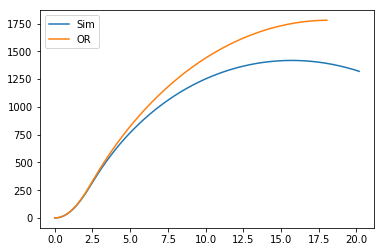

In [85]:
plot(simTime, simAlt, label='Sim')
plot(ORTime[:ap_ind], ORAlt[:ap_ind], label='OR')
legend()
show()


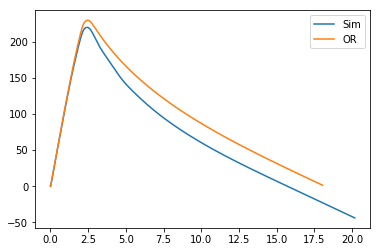

In [80]:
plot(simTime, simVel, label='Sim')
plot(ORTime[:ap_ind], ORVel[:ap_ind], label='OR')
legend()
show()

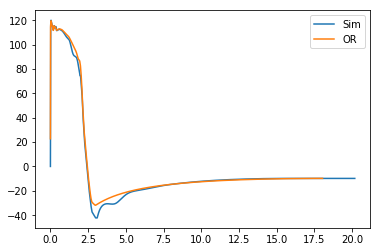

In [81]:
plot(simTime, simAcc, label='Sim')
plot(ORTime[:ap_ind], ORAcc[:ap_ind], label='OR')
legend()
show()